In [1]:
import numpy as np
import torch

In [2]:
# Creating a vector, matrix and tensor in python.
nvector = np.array([[1,2,3,4]])
nmatrix = np.array([ [1,2,3,4],
                   [5,6,7,8]
                   ])
ntensor = torch.tensor([ [1,2,3,4]])

## Softmax

In [3]:
# importing all the required libraries.
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
z = [1,2,3]

num = np.exp(z)
den = np.sum(np.exp(z))
sigma = num / den # Softmax

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[-3  6  8  0 -3 -5 11 -4 11 10 14  7 13  1  1  2 11 10  0  9 10  3 -3  0
 10]


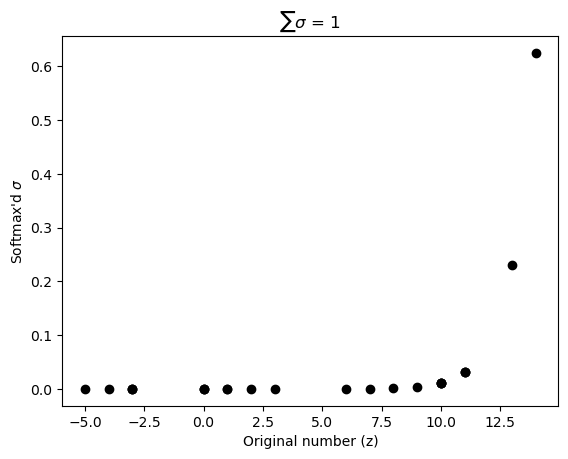

In [5]:
# Using some random numbers
z = np.random.randint(-5, high=15, size=25)
print(z)

# compute softmax
num = np.exp(z)
den = np.sum(np.exp(z))
sigma = num / den # Softmax

# Compare

plt.plot(z, sigma, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel("Softmax'd $\sigma$")

# plt.yscale('log') #linear transformation in log space
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()


## Softmax using PyTorch

In [6]:
softfun = nn.Softmax(dim=0)

sigmaT = softfun(torch.Tensor(z))

print(sigmaT)

tensor([2.5858e-08, 2.0953e-04, 1.5483e-03, 5.1938e-07, 2.5858e-08, 3.4996e-09,
        3.1098e-02, 9.5128e-09, 3.1098e-02, 1.1440e-02, 6.2461e-01, 5.6957e-04,
        2.2978e-01, 1.4118e-06, 1.4118e-06, 3.8377e-06, 3.1098e-02, 1.1440e-02,
        5.1938e-07, 4.2086e-03, 1.1440e-02, 1.0432e-05, 2.5858e-08, 5.1938e-07,
        1.1440e-02])


## Logarithms

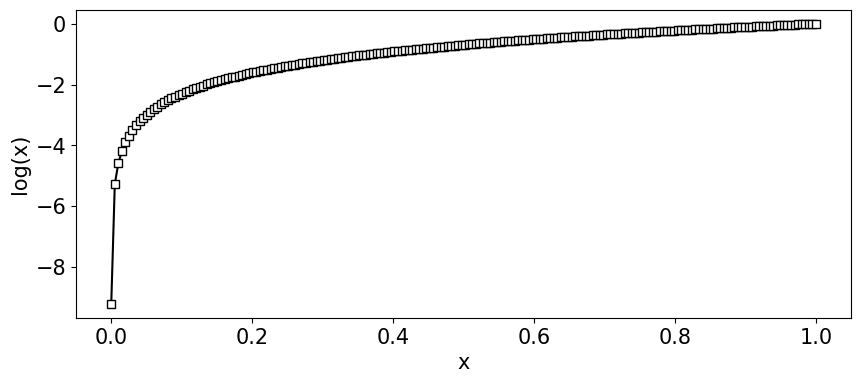

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(.0001,1,200)

# computing log
logx = np.log(x)

fig = plt.figure(figsize=(10,4))

# increase the font size
plt.rcParams.update({'font.size':15})

plt.plot(x, logx, 'ks-', markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

### Natural Log and Natural Exponents are inverses

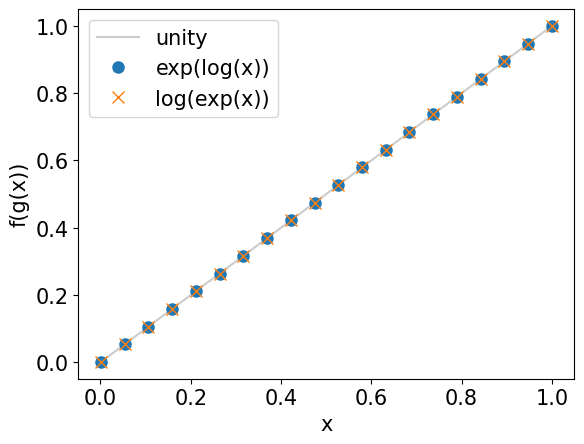

In [8]:
x = np.linspace(.001, 1, 20)

logx = np.log(x)
expx = np.exp(x)

plt.plot(x, x, color=[.8,.8,.8])
plt.plot(x, np.exp(logx), 'o', markersize=8)
plt.plot(x, np.log(expx), 'x', markersize=8)

plt.xlabel('x')
plt.ylabel('f(g(x))')

plt.legend(['unity', 'exp(log(x))', 'log(exp(x))'])
plt.show()


## Entropy and Cross Entropy

$H(p) = - \sum_x p(x) log(p(x))$

In [9]:
# Computing Entropy

x = [.25, .75]

H = 0

for p in x:
    H -= p*np.log(p)
    
H

0.5623351446188083

In [10]:
# Alternate method written for N=2 events

H = - (p*np.log(p) + (1-p)*np.log(1-p))
H

0.5623351446188083

## Cross-entropy

In [11]:
p =  [1, 0]
q = [.25, .75]

H = 0
for i in range(len(p)):
    H -= p[i]*np.log(q[i])
    
print(H)

1.3862943611198906


In [12]:
# Written for N=2 events

H = -(p[0]*np.log(q[0]) + p[1]*np.log(q[1]))
H

1.3862943611198906

In [13]:
# Simplied code 

H = -np.log(q[0])
H

1.3862943611198906

### Cross-entropy with PyTorch

In [14]:
import torch
import torch.nn.functional as F

q_tensor = torch.Tensor(q)
p_tensor = torch.Tensor(p)

F.binary_cross_entropy(q_tensor, p_tensor)


tensor(1.3863)

## Min/max - argmin/argmax

In [15]:
M = np.array([ 
[0, 1, 10],
[20, 8, 5]
])

minvals1 = np.min(M)
minvals2 = np.min(M, axis=0)
minvals3 = np.min(M, axis=1)

minidx1 = np.argmin(M)
minidx2 = np.argmin(M, axis=0)
minidx3 = np.argmin(M, axis=1)

print(minvals1)
print(minvals2)
print(minvals3)

print(M), print(' ') # reminder
print(minidx1)
print(minidx2)
print(minidx3)

# Using Pytorch 

M = torch.tensor([[0, 1, 10], [20, 8, 5]])

# various minima in this matrix!
min1 = torch.min(M)        # minimum from ENTIRE matrix
min2 = torch.min(M,axis=0) # minimum of each column (across rows)
min3 = torch.min(M,axis=1) # minimum of each row (across columns)

# print them out
print(min1), print(' ')
print(min2), print(' ')
print(min2.values)
print(min2.indices)

0
[0 1 5]
[0 5]
[[ 0  1 10]
 [20  8  5]]
 
0
[0 0 1]
[0 2]
tensor(0)
 
torch.return_types.min(
values=tensor([0, 1, 5]),
indices=tensor([0, 0, 1]))
 
tensor([0, 1, 5])
tensor([0, 0, 1])


## Random Sampling

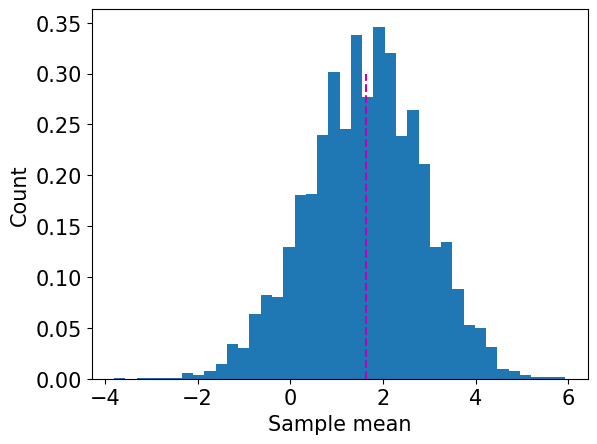

In [16]:
# create a list of numbers to compute the mean and variance of
x = [1,2,4,6,5,4,0,-4,5,-2,6,10,-9,1,3,-6]
n = len(x)

# compute the population mean
popmean = np.mean(x)

# compute a sample mean
sample = np.random.choice(x,size=5,replace=True)
sampmean = np.mean(sample)

# compute lots of sample means

# number of experiments to run
nExpers = 10000

# run the experiment!
sampleMeans = np.zeros(nExpers)
for i in range(nExpers):

  # step 1: draw a sample
  sample = np.random.choice(x,size=15,replace=True)

  # step 2: compute its mean
  sampleMeans[i] = np.mean(sample)



# show the results as a histogram
plt.hist(sampleMeans,bins=40,density=True)
plt.plot([popmean,popmean],[0,.3],'m--')
plt.ylabel('Count')
plt.xlabel('Sample mean')
plt.show()

## Random Seed

In [17]:
# Old method 
# np.random.seed(17)

# New method
randseed1 = np.random.RandomState(17)
randseed2 = np.random.RandomState(20210530)

print( randseed1.randn(5) ) # same sequence
print( randseed2.randn(5) ) # different from above, but same each time
print( randseed1.randn(5) ) # same as two up
print( randseed2.randn(5) ) # same as two up
print( np.random.randn(5) ) # different every time

torch.randn(5)

torch.manual_seed(17)
print("\n Tensor results : ")
print(torch.randn(5))

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
[ 0.24829688 -0.3618167  -0.81265345  0.04638958  0.49112397]

 Tensor results : 
tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])


## T-test

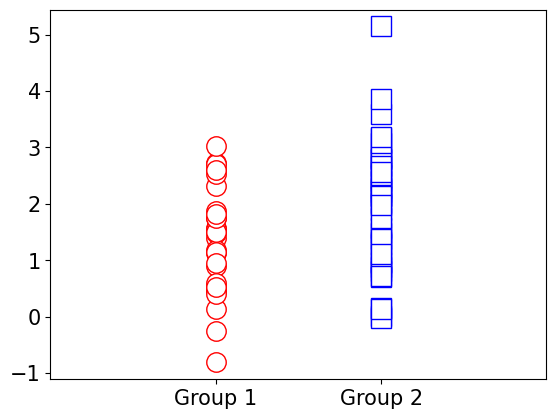

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Manual Calculations

# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 2   # population mean in dataset 2

# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)



# plot them
plt.plot(np.zeros(n1),data1,'ro',markerfacecolor='w',markersize=14)
plt.plot(np.ones(n2), data2,'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])
plt.show()

In [19]:
# t-test via stats package

# _ind = independent samples
t,p = stats.ttest_ind(data1,data2)
print(t)
print(p)

-2.330792851099234
0.022737453192012157


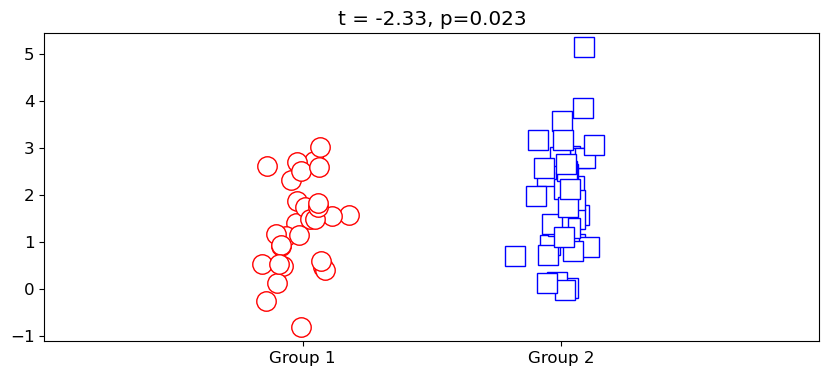

In [20]:
# common way to show t-test results in a plot
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':12}) # change the font size

plt.plot(0+np.random.randn(n1)/15, data1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])

# set the title to include the t-value and p-value
plt.title(f't = {t:.2f}, p={p:.3f}')

plt.show()


2*x**2
4*x


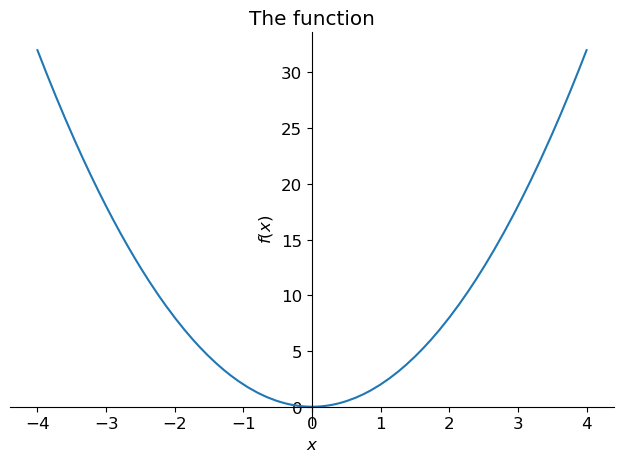

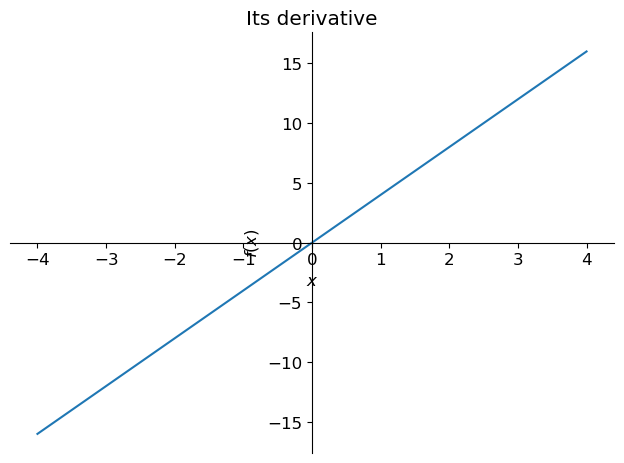

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# sympy = symbolic math in Python
import sympy as sym
import sympy.plotting.plot as symplot


# create symbolic variables in sympy
x = sym.symbols('x')

# create a function
fx = 2*x**2

# compute its derivative
df = sym.diff(fx,x)

# print them
print(fx)
print(df)

# plot them
symplot(fx,(x,-4,4),title='The function')
plt.show()

symplot(df,(x,-4,4),title='Its derivative')
plt.show()


## ReLU and Sigmoid

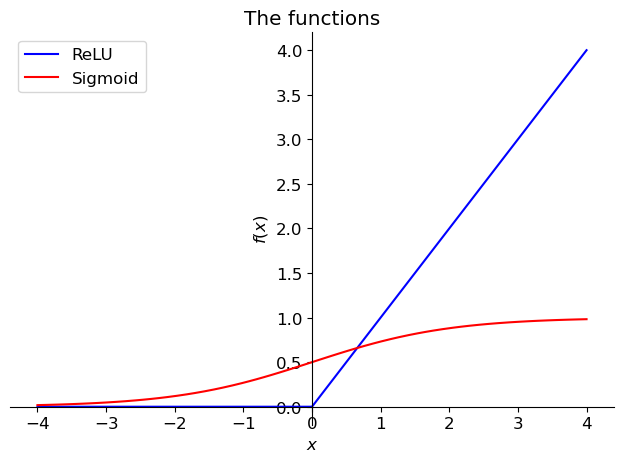

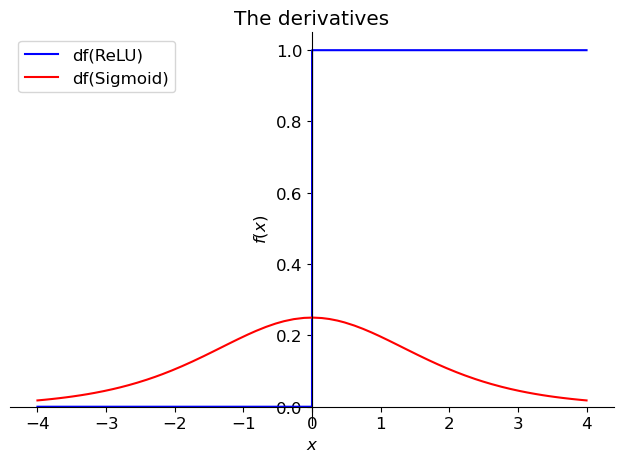

In [22]:
# repeat with relu and sigmoid

# create symbolic functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

# graph the functions
p = symplot(relu,(x,-4,4),label='ReLU',show=False,line_color='blue')
p.extend( symplot(sigmoid,(x,-4,4),label='Sigmoid',show=False,line_color='red') )
p.legend = True
p.title = 'The functions'
p.show()


# graph their derivatives
p = symplot(sym.diff(relu),(x,-4,4),label='df(ReLU)',show=False,line_color='blue')
p.extend( symplot(sym.diff(sigmoid),(x,-4,4),label='df(Sigmoid)',show=False,line_color='red') )
p.legend = True
p.title = 'The derivatives'
p.show()

## Product and Chain Rule

In [23]:
# import libraries
import numpy as np
import sympy as sym

# make the equations look nicer
from IPython.display import display

# create symbolic variables in sympy
x = sym.symbols('x')

# create two functions
fx = 2*x**2
gx = 4*x**3 - 3*x**4

# compute their individual derivatives
df = sym.diff(fx)
dg = sym.diff(gx)

# apply the product rule "manually"
manual = df*gx + fx*dg
thewrongway = df*dg

# via sympy
viasympy = sym.diff( fx*gx )


# print everything
print('The functions:')
display(fx)
display(gx)
print(' ')

print('Their derivatives:')
display(df)
display(dg)
print(' ')

print('Manual product rule:')
display(manual)
print(' ')

print('Via sympy:')
display(viasympy)
print(' ')


print('The wrong way:')
display(thewrongway)

The functions:


2*x**2

-3*x**4 + 4*x**3

 
Their derivatives:


4*x

-12*x**3 + 12*x**2

 
Manual product rule:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
Via sympy:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
The wrong way:


4*x*(-12*x**3 + 12*x**2)

In [24]:
# repeat with chain rule
gx = x**2 + 4*x**3
fx = ( gx )**5

print('The function:')
display(fx)
print(' ')

print('Its derivative:')
display(sym.diff(fx))


The function:


(4*x**3 + x**2)**5

 
Its derivative:


(60*x**2 + 10*x)*(4*x**3 + x**2)**4